<a href="https://colab.research.google.com/github/venkatesh1234546/grow-with-code/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

Data Preprocessing

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
#Checking for null value

In [9]:
data.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [10]:
data.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [11]:
df= data.reset_index()['Open']
print(df)

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64


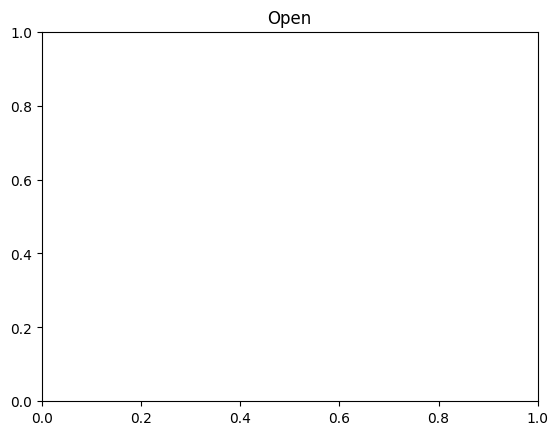

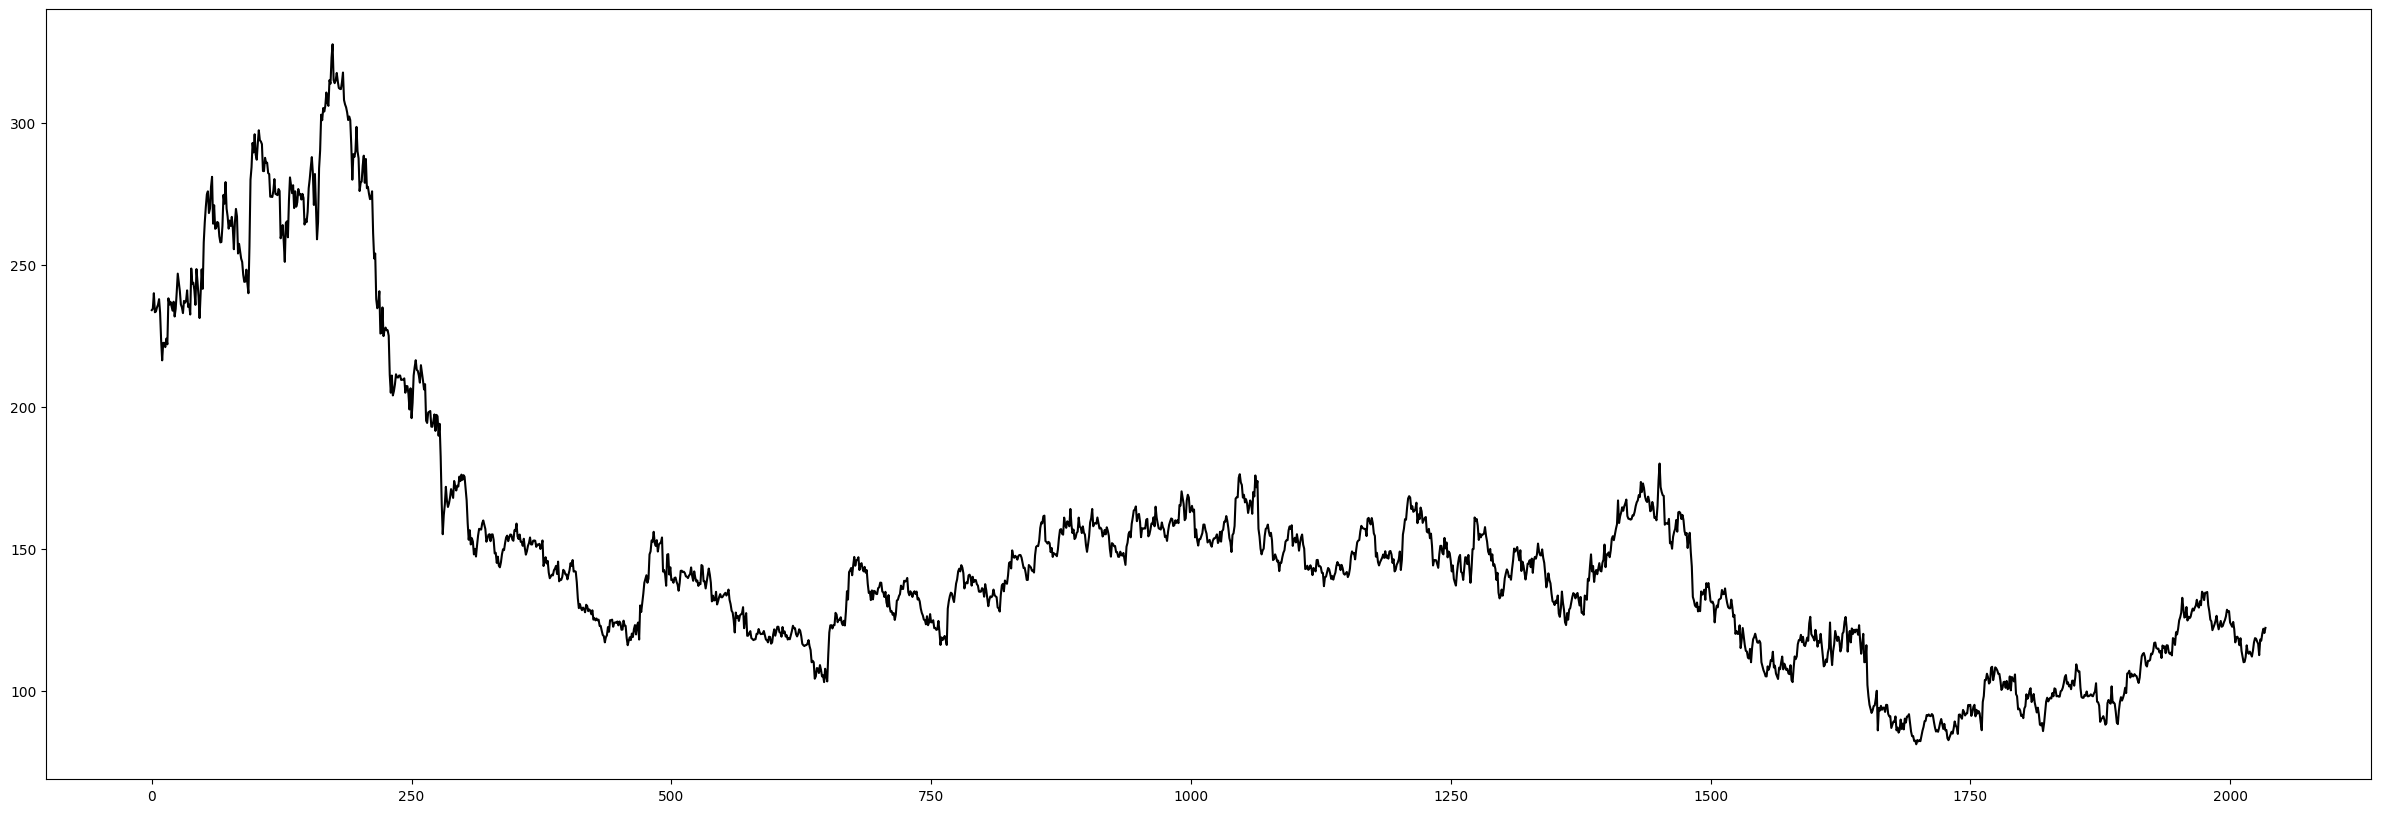

In [12]:
plt.title("Open")
plt.subplots(figsize = (30,10))
plt.plot(df , color ="black")

In [13]:
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
df.shape

(2035, 1)

In [14]:
print(df)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


data splitting in train data and test data

In [15]:
training_size = int( len(df) * 0.75)
testing_size  = len(df) - training_size
train_data , test_data = df[0 : training_size, :], df[training_size : len(df), :1]
training_size , testing_size

(1526, 509)

In [16]:
train_data , test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]),
 array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.097120

In [17]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return np.array(train_X), np.array(train_Y)

In [18]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

Reshape the input to be [samples, time steps, features] which is the requirement of LSTM

In [19]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [22]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 3, batch_size = 8, verbose = 1)

Epoch 1/3
179/179 [==============================] - 77s 426ms/step - loss: 0.0016 - val_loss: 9.6010e-04
Epoch 2/3
179/179 [==============================] - 68s 381ms/step - loss: 0.0013 - val_loss: 7.9945e-04
Epoch 3/3
179/179 [==============================] - 64s 357ms/step - loss: 8.9082e-04 - val_loss: 4.9523e-04


In [28]:
#Lets predict and check performance metrics

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

print('RMSE performance matrics : ',math.sqrt(mean_squared_error(y_train, train_predict)) )

RMSE performance matrics :  161.263299675545


In [30]:
print("Test data RMSE : ",math.sqrt(mean_squared_error(y_test , test_predict)) )

Test data RMSE :  106.89920267188856


In [31]:
#Shift train prediction for plotting

look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting

testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df) - 1, :] = test_predict

Plot baseline

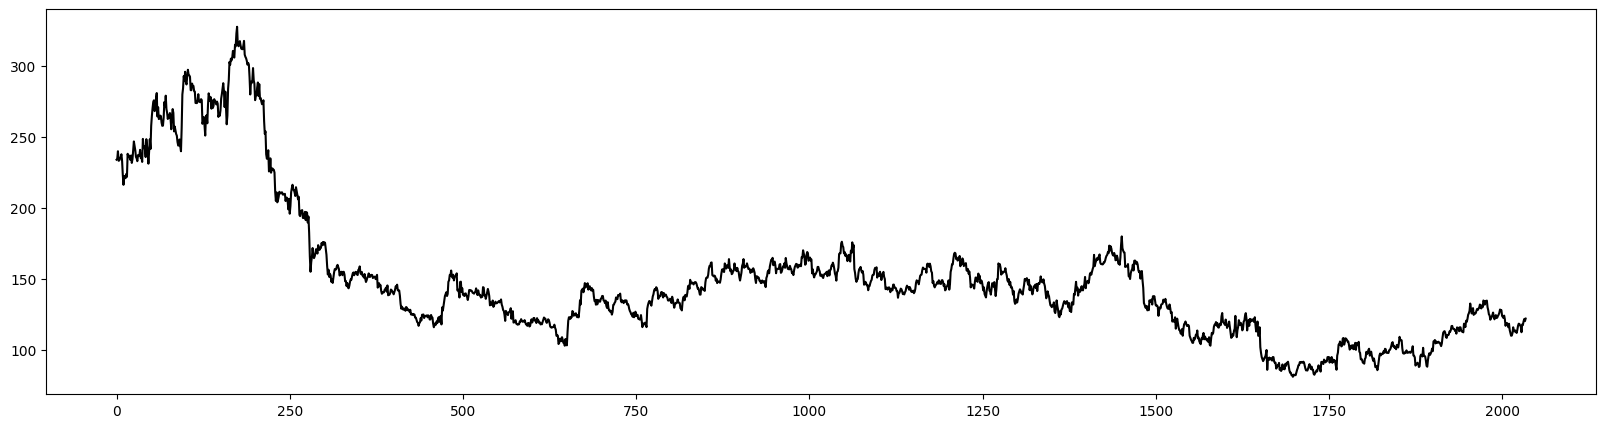

In [32]:
plt.subplots(figsize=(20,5))
plt.plot(scaler.inverse_transform(df), color= 'black')
plt.show()

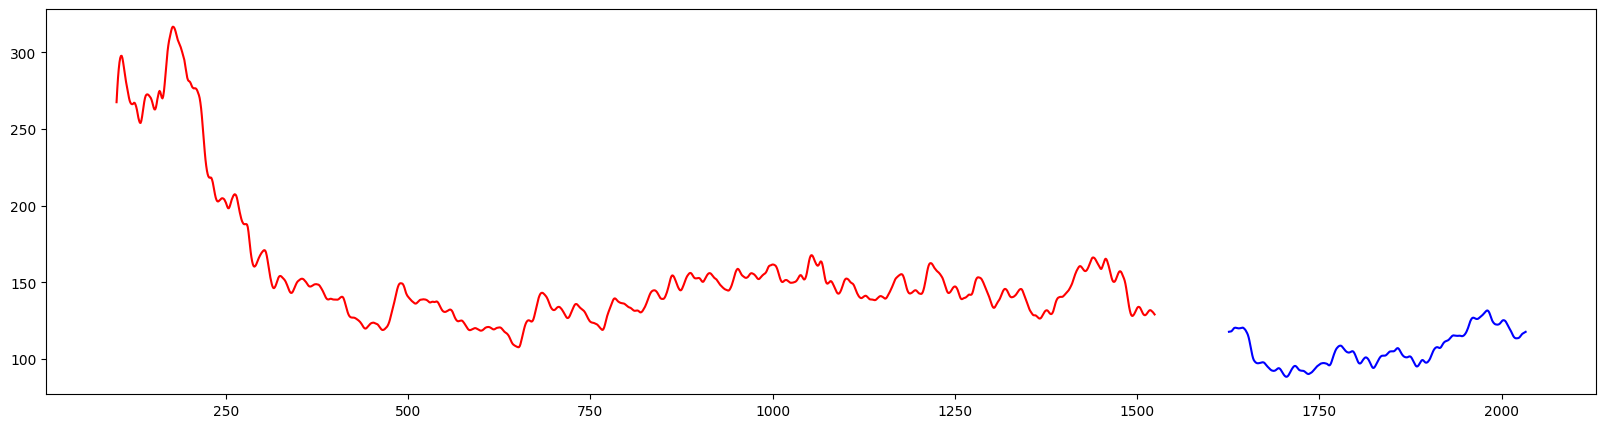

In [33]:
plt.subplots(figsize=(20,5))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='blue')
plt.show()

Baseline and train, test prediction

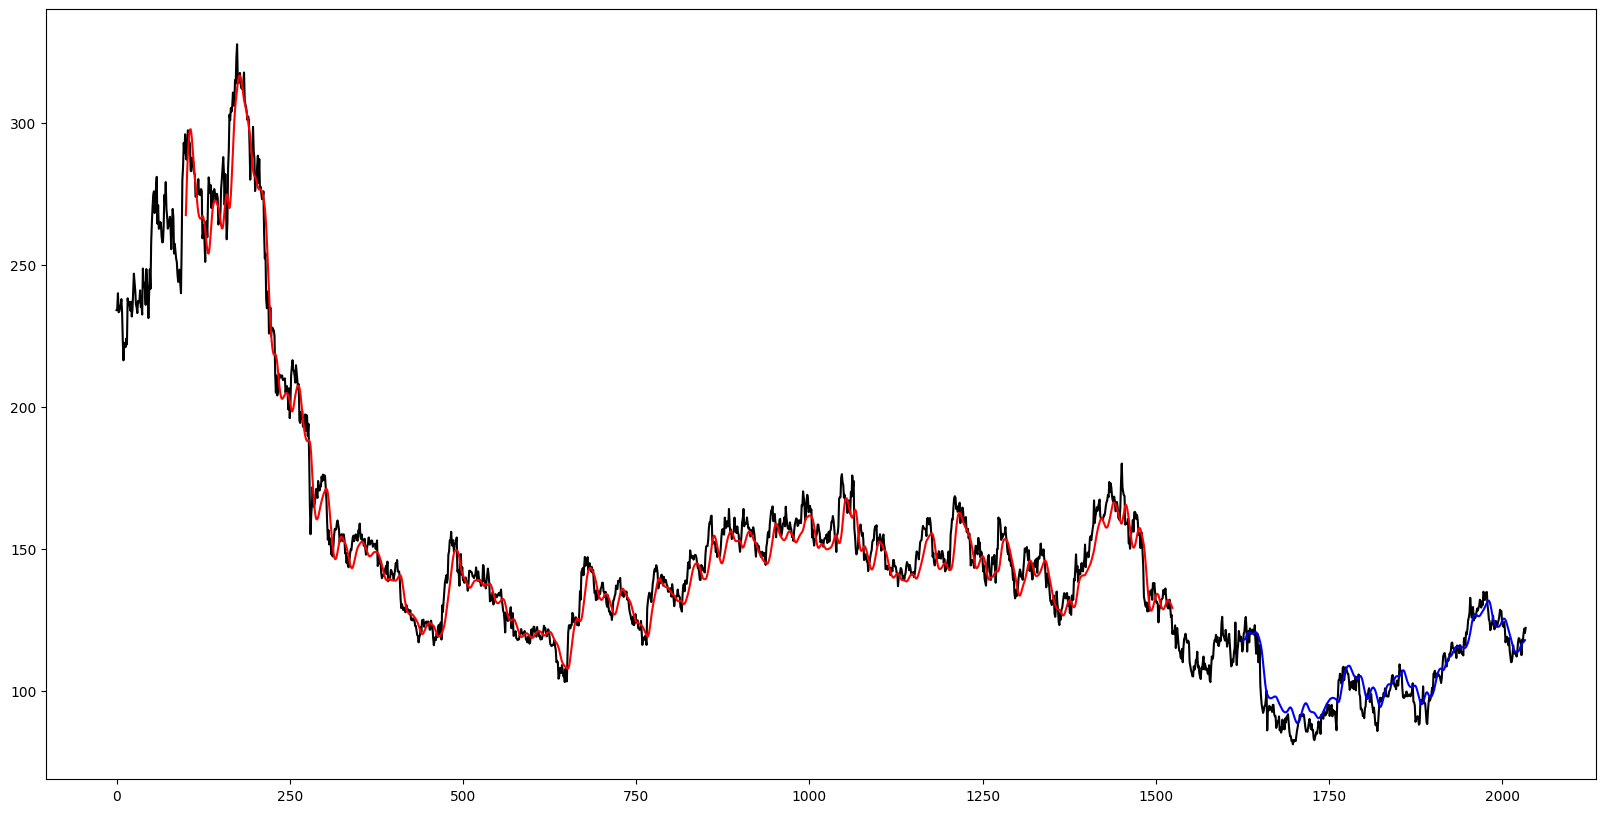

In [34]:
plt.subplots(figsize=(20,10))
plt.plot(scaler.inverse_transform(df), color= 'black')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='blue')
plt.show()

In [35]:
print("Length of test data : ", len(test_data))

Length of test data :  509


In [36]:
test_data.shape


(509, 1)

now taking previous 100 days data from test data prediction of future data i.e.
509-100=409

In [38]:
x_ip = test_data[409:].reshape(1,-1)


In [39]:
temp_ip = list(x_ip)
temp_ip = temp_ip[0].tolist()

In [40]:
lst_output=[]
n_steps=100

future_Days= 15

i=0

while(i<future_Days):

    if(len(temp_ip)>100):
        x_ip = np.array(temp_ip[1:])
        print("Day {} input {}".format(i,x_ip))

        x_ip = x_ip.reshape(1,-1)
        x_ip = x_ip.reshape((1, n_steps, 1))
        yhat = model.predict(x_ip, verbose=0)
        print("Day {} output {}\n".format(i,yhat))

        temp_ip.extend(yhat[0].tolist())
        temp_ip = temp_ip[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_ip = x_ip.reshape((1, n_steps,1))
        yhat = model.predict(x_ip, verbose=0)
        print(yhat[0])
        temp_ip.extend(yhat[0].tolist())
        print(len(temp_ip))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.15289138]
101
Day 1 input [0.13746959 0.13990268 0.13017032 0.14152474 0.14111922 0.13138686
 0.12915653 0.13098135 0.1269262  0.15166261 0.15004055 0.14193025
 0.16017843 0.15693431 0.16504461 0.1770073  0.18146796 0.18815896
 0.20924574 0.19424169 0.18106245 0.18207624 0.1960665  0.17680454
 0.18207624 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757
 0.19505272 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956
 0.19870235 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501
 0.2175588  0.19870235 0.19018654 0.17802109 0.175588   0.16301703
 0.16707218 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358
 0.16991079 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281
 0.18268451 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457
 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995

In [41]:
day_new = np.arange(1,101)
day_pred = np.arange(101,116)

In [42]:
fd = df.tolist()
fd.extend(lst_output)

In [43]:
len(df)

2035

In [44]:
2035-100

1935

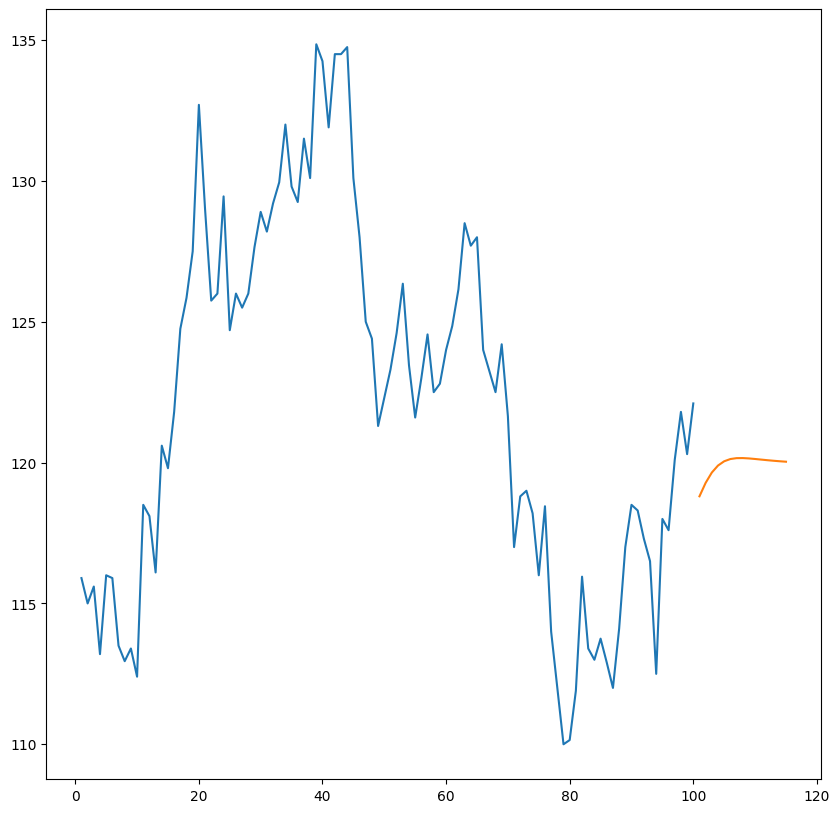

In [45]:
plt.subplots(figsize = (10,10))
plt.plot(day_new, scaler.inverse_transform(df[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))